# Exercise 1
## Part 1

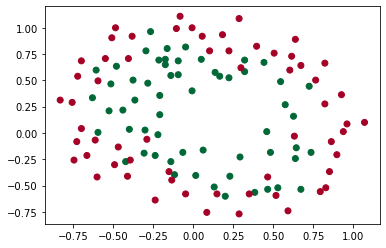

In [1]:
# Imports.
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

# Loading data to arrays and plot into graph.
X = np.loadtxt("datasets/microchips.csv", delimiter=",", usecols=(0,1))
y = np.loadtxt("datasets/microchips.csv", delimiter=",", usecols=(1,2))[:,1:]  # Done like this to preserve a (118,1 shape)
plt.scatter(X[:, :1], X[:, 1:], c=y, cmap="RdYlGn")

## Part 2

In [2]:
# Credits for array sorting trick: "https://thispointer.com/sorting-2d-numpy-array-by-column-or-row-in-python/"
# knn implementation
def pass_test_knn(k: int, test, X, y): # Takes k, test point and model
    if k % 2 == 0:
        print("k must be odd.")
    
    # Get distance of each point in model from test point.
    test_dist = test - X
    test_dist = np.sqrt(test_dist[:, :1] ** 2 + test_dist[:, 1:] ** 2)

    # Combine distance array with response of each point.
    dist_with_validity = np.zeros((118, 2))
    dist_with_validity[:, :1] = test_dist
    dist_with_validity[:, 1:] = y
    dist_with_validity = dist_with_validity[dist_with_validity[:, 0].argsort()]  # Sort array by distance

    # Test with k nearest neighbors.
    k_rows = dist_with_validity[:k]
    return True if np.sum(k_rows[:, 1]) > k // 2 else False

# Test 3 chips with varying k hyperparameters.
chips = [np.array([-0.3, 1.0]), np.array([-0.5, -0.1]), np.array([0.6, 0.0])]
for k in range(1, 8, 2):
    print(f"k = {k}")
    test_num = 0
    for chip in chips:
        result = "OK." if pass_test_knn(k, chip, X, y) else "Fail."
        print(f"    Chip {test_num + 1}: {chips[test_num]} ==> " + result)
        test_num += 1
    print()

k = 1
    Chip 1: [-0.3  1. ] ==> OK.
    Chip 2: [-0.5 -0.1] ==> Fail.
    Chip 3: [0.6 0. ] ==> Fail.

k = 3
    Chip 1: [-0.3  1. ] ==> Fail.
    Chip 2: [-0.5 -0.1] ==> Fail.
    Chip 3: [0.6 0. ] ==> OK.

k = 5
    Chip 1: [-0.3  1. ] ==> Fail.
    Chip 2: [-0.5 -0.1] ==> OK.
    Chip 3: [0.6 0. ] ==> OK.

k = 7
    Chip 1: [-0.3  1. ] ==> Fail.
    Chip 2: [-0.5 -0.1] ==> Fail.
    Chip 3: [0.6 0. ] ==> OK.



## Part 3

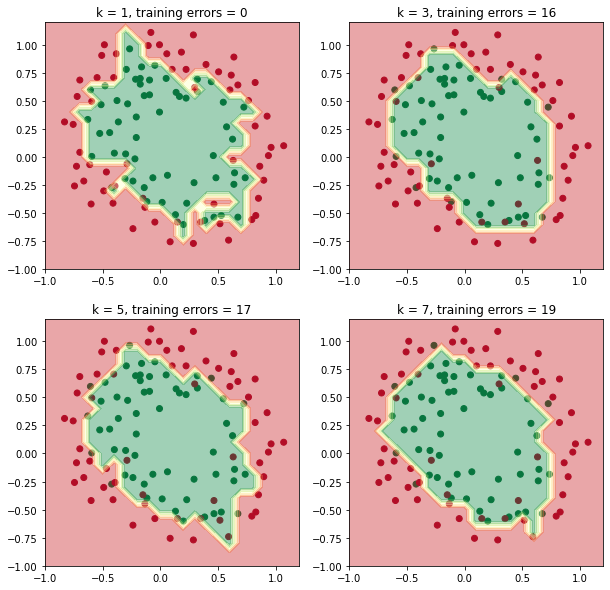

In [3]:
# Credits for decision boundary plotting: "https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html"
# Prepare meshgrid for decision boundary.
x_min, x_max = -1, 1.25
y_min, y_max = -1, 1.25
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1)) # TODO: Experiment with different step size.

# Prepare subplots for each k.
f, axarr = plt.subplots(2, 2, figsize=(10,10))
for idx, k in zip(
    product([0, 1], [0, 1]),
    [1, 3, 5, 7],
):
    # Prepare response for each point in meshgrid.
    Z = np.zeros((23, 23))
    for i in range(23):
        row = np.zeros(23)
        for j in range(23):
            row[j] = 1 if pass_test_knn(k, np.array([xx[i][j], yy[i][j]]), X, y) else 0
        Z[i] = row
        
    # Calculate training errors.
    training_errors = 0
    for chip_idx in range(118):
        model_validity = True if y[chip_idx][0] == 1 else False
        if pass_test_knn(k, X[chip_idx], X, y) != model_validity: 
            training_errors += 1 
     
    # Add subplot.
    axarr[idx[0], idx[1]].scatter(X[:, :1], X[:, 1:], c=y, cmap="RdYlGn")
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, cmap="RdYlGn", alpha=0.4)
    axarr[idx[0], idx[1]].set_title(f"k = {k}, training errors = {training_errors}")
plt.show()
